In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import random
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output

Dataset: [Kaggle link (boston house prices)](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data) 

In [2]:
# please download the dataset from: 
# https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data
# and save it in the datasets folder (directly in the project folder)
df = pd.read_csv('../datasets/boston.csv') 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


For the sake of simplicity, we will try to predict the house price (MEDV - Median value of owner-occupied homes in $1000's [k$]) base only on its average number of rooms per dwelling (RM). And I will refer to these features as "price" and "number of room" for MEDV and RM respectively (See [Attribute Information](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data) for further details) 

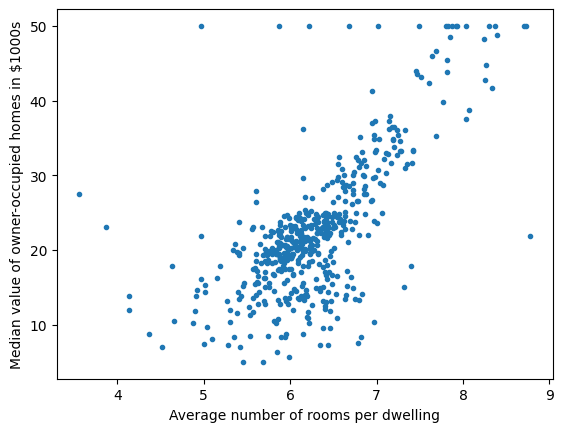

In [3]:
all_num_rooms = df["RM"].values
all_true_prices = df["MEDV"].values

def plot(inputs, outputs, predictions=None, is_show=True):
    plt.xlabel('Average number of rooms per dwelling')
    plt.ylabel('Median value of owner-occupied homes in $1000s')
    plt.scatter(inputs, outputs, marker='.')
    if predictions is not None:
        plt.plot(inputs, predictions, color='red')
    if is_show:
        plt.show()

plot(all_num_rooms, all_true_prices)

## Introduction to Linear Regression

In [4]:
def predict(rooms, m, b):
    return m * rooms + b # y = mx + b

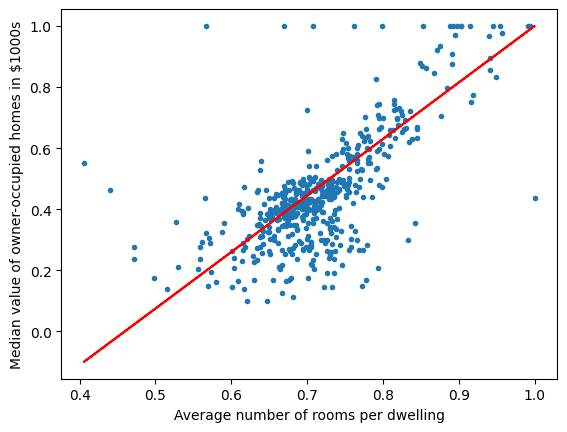

In [5]:
max_num_rooms = all_num_rooms.max()
max_true_prices = all_true_prices.max()

# normalize the data to be between 0 and 1
all_num_rooms /= all_num_rooms.max() 
all_true_prices /= all_true_prices.max()

good_m, good_b = 1.85, -0.85
predictions = predict(all_num_rooms, good_m, good_b)

plot(all_num_rooms, all_true_prices, predictions)

In [6]:
# now do the same thing for b
def updatePlotB(m, b):
    plt.figure(figsize=(3, 3))
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.plot([-1, 1], [-m + b, m + b], color='red')
    plt.show()

interact(updatePlotB, 
    m=widgets.FloatSlider(value=1, min=-2, max=2, step=0.01), 
    b=widgets.FloatSlider(value=0, min=-2, max=2, step=0.01))

interactive(children=(FloatSlider(value=1.0, description='m', max=2.0, min=-2.0, step=0.01), FloatSlider(value…

<function __main__.updatePlotB(m, b)>

# Naive implementation

Initial m:  0.7621270801875983
Initial b:  0.6621196129638492


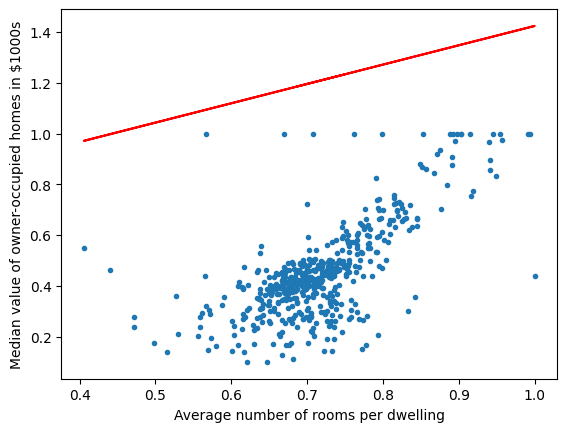

In [7]:
# our custom m and b set to random values initially
m = random.random()
b = random.random()

print("Initial m: ", m)
print("Initial b: ", b)

predictions = predict(all_num_rooms, m, b)
plot(all_num_rooms, all_true_prices, predictions)

In [8]:
def totalLoss(predictions, targets):
    return np.sum((predictions - targets) ** 2) / 2

predictions = predict(all_num_rooms, m, b)
print("Initial loss: ", totalLoss(predictions, all_true_prices))

Initial loss:  150.519178382442


In [9]:
def calculateBetterParameters(inputs, targets, m, b, learning_rate):
    outputs = predict(inputs, m, b)
    # wrt = with respect to
    change_in_loss_wrt_predictions = outputs - targets # dloss/dy

    change_in_loss_wrt_m = change_in_loss_wrt_predictions * inputs # dloss/dm
    change_in_loss_wrt_b = change_in_loss_wrt_predictions * 1 # dloss/db

    new_m = m - learning_rate * change_in_loss_wrt_m.sum()
    new_b = b - learning_rate * change_in_loss_wrt_b.sum()

    return new_m, new_b

Button(description='Update parameters', style=ButtonStyle())

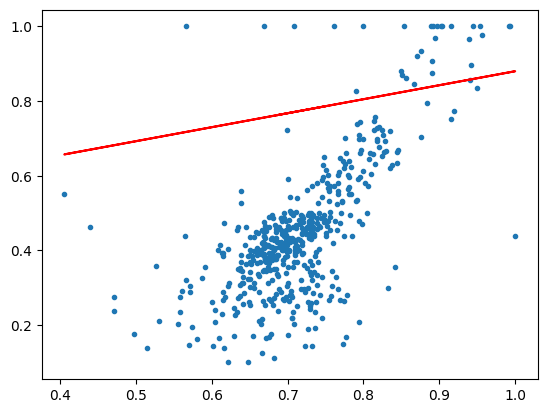

In [10]:
m = random.random()
b = random.random()

learning_rate = 0.002

fig, ax = plt.subplots()
ax.scatter(all_num_rooms, all_true_prices, marker='.')
line, = ax.plot(all_num_rooms, predict(all_num_rooms, m, b), color='red')

def updateParameters(change):
    global m, b
    m, b = calculateBetterParameters(all_num_rooms, all_true_prices, m, b, learning_rate)
    predictions = predict(all_num_rooms, m, b)

    line.set_ydata(predictions)
    fig.canvas.draw_idle()
    clear_output()
    display(button)
    display(fig)
    print("Loss: ", totalLoss(predictions, all_true_prices))

button = widgets.Button(description="Update parameters")
button.on_click(updateParameters)
display(button)

Final loss:  4.65680899487846


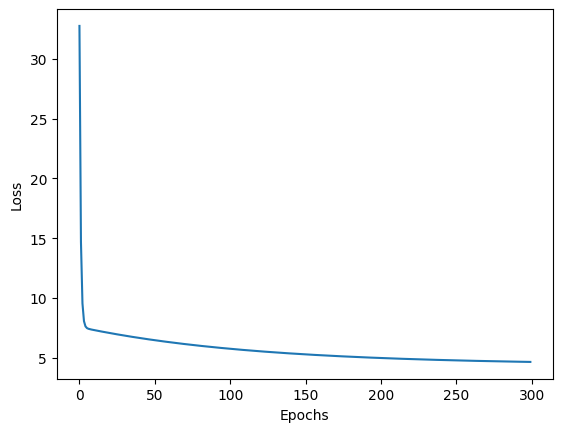

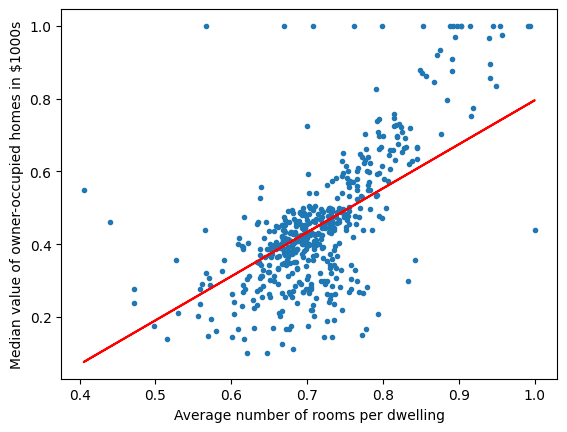

In [11]:
m = random.random()
b = random.random()

epochs = 300
loss_history = []

for i in range(epochs):
    m, b = calculateBetterParameters(all_num_rooms, all_true_prices, m, b, 0.002) # update m and b
    predictions = predict(all_num_rooms, m, b)
    loss_history.append(totalLoss(predictions, all_true_prices))

print("Final loss: ", loss_history[-1])
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plot(all_num_rooms, all_true_prices, predictions) # plot the final predictions (custom m and b)

In [12]:
def onSubmit(change):
    if not change.new.replace(".", "", 1).isdigit():
        print("Please enter a number")
        return
    rooms = float(change.new) 
    price = predict(rooms / max_num_rooms, m, b)
    clear_output(wait=True)
    display(input_form)
    print("Number of rooms: ", rooms)
    print("Predicted price: ", '{:,}'.format(int(price * max_true_prices * 1000)), "$")

input_form = widgets.Text(description="#rooms")
input_form.observe(onSubmit, names='value')
display(input_form)

Text(value='', description='#rooms')

> NOTE: Any number of rooms below 4 will produce a negative number.

# General/formal form and implementation